In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glmnet
import sys
import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier 
import sklearn.tree
import scipy.sparse
RESULTS_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/results/ML_phenotype_prediction/'

/share/software/user/open/py-scikit-learn/0.19.1_py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


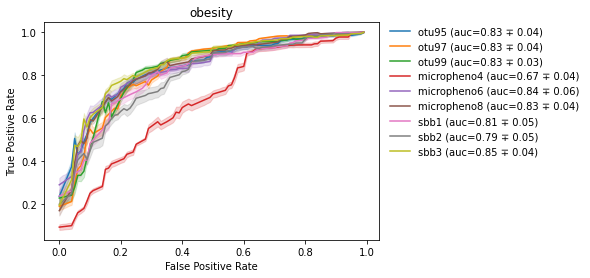

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


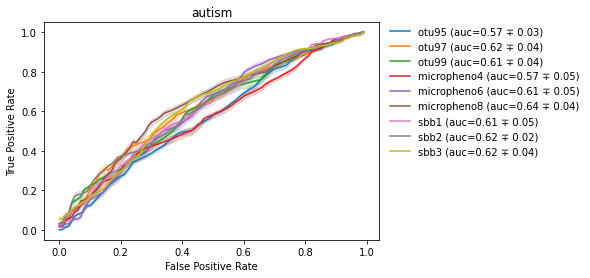

In [4]:
for dataset in ['obesity', 'autism']:
    df_concat = pd.DataFrame()
    for sbb in ['otu95', 'otu97', 'otu99', 'micropheno4', 'micropheno6', 'micropheno8', 'sbb1', 'sbb2', 'sbb3']:
        fpr_tpr = pd.read_table(RESULTS_DIR + 'fpr_vs_tpr_%s_%s.tsv' % (sbb, dataset), index_col=0)
        auc = np.loadtxt(RESULTS_DIR + 'auc_%s_%s.txt' % (sbb, dataset))
        df = fpr_tpr.melt()
        df.columns = ['False Positive Rate', 'True Positive Rate']
        df['auc'] = '%s (auc=%.2f ∓ %.2f)' % (sbb, np.mean(auc), np.std(auc))
        df_concat = pd.concat([df_concat, df])

    fig, ax = plt.subplots()
    sns.lineplot(data=df_concat,x='False Positive Rate',y='True Positive Rate', hue='auc', ax=ax)
    ax.set_xticklabels([0.0, .2, .4, .6, .8, 1.0])
    ax.set_xticks([0,20,40,60,80,100])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
    plt.title(dataset)
    plt.savefig(RESULTS_DIR + 'ROC_%s.svg' % dataset, transparent=True)
    plt.show()